In [48]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [49]:
dataset = pd.read_csv('car_data.csv')  # if you have a .csv file


In [91]:
dataset.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,3,2014,5.59,27000,1,0,1,0,3.35
1,6,2013,9.54,43000,0,0,1,0,4.75
2,1,2017,9.85,6900,1,0,1,0,7.25
3,8,2011,4.15,5200,1,0,1,0,2.85
4,5,2014,6.87,42450,0,0,1,0,4.60


In [51]:
dataset.isnull().sum() #check missing contant

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [52]:
dataset.info()   #check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       140 non-null    object 
 1   Year           140 non-null    int64  
 2   Present_Price  140 non-null    float64
 3   Kms_Driven     140 non-null    int64  
 4   Fuel_Type      140 non-null    object 
 5   Seller_Type    140 non-null    object 
 6   Transmission   140 non-null    object 
 7   Owner          140 non-null    int64  
 8   Selling_Price  140 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 10.0+ KB


In [53]:
#use encoding for Ml

#car name

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
car_name_l = LabelEncoder()  # Create a LabelEncoder object to convert car names (text) into numbers

dataset["Car_Name"] = car_name_l.fit_transform(dataset["Car_Name"])  
# This line does two things:
# 1. It learns all unique car names using .fit()
# 2. Then replaces each name with a unique number using .transform()
# Example: "ritz" → 2, "ciaz" → 0, "swift" → 4 (numbering depends on sorting)


In [56]:
dataset["Car_Name"] = car_name_l.fit_transform(dataset["Car_Name"])  
# Converts all car names (text) to numbers so machine learning models can use them


#fule type

In [57]:
dataset["Fuel_Type"].unique()  
# Shows all unique fuel types available in the dataset (like Petrol, Diesel, CNG)

array(['Petrol', 'Diesel'], dtype=object)

In [58]:
fule_ty = LabelEncoder()  

dataset["Fuel_Type"] = car_name_l.fit_transform(dataset["Fuel_Type"])  

#seller type

In [59]:
seller_ty = LabelEncoder()  

dataset["Seller_Type"] = car_name_l.fit_transform(dataset["Seller_Type"])  

#Transmission

In [60]:
Transmission_ty = LabelEncoder()  

dataset["Transmission"] = car_name_l.fit_transform(dataset["Transmission"])  

In [61]:
input_data = dataset.iloc[:, :-1]       # selects all rows, and all columns except the last one
output_data = dataset["Selling_Price"]  # selects only the Selling_Price column as the target/output


In [62]:
print(input_data.head())       # shows first 5 rows of input (X) data


   Car_Name  Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0         3  2014           5.59       27000          1            0   
1         6  2013           9.54       43000          0            0   
2         1  2017           9.85        6900          1            0   
3         8  2011           4.15        5200          1            0   
4         5  2014           6.87       42450          0            0   

   Transmission  Owner  
0             1      0  
1             1      0  
2             1      0  
3             1      0  
4             1      0  


In [63]:
print(output_data.head())      # shows first 5 values of output (y) data

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [64]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()  # create a scaler object

input_data = pd.DataFrame(
    ss.fit_transform(input_data),       # scale the data (mean=0, std=1)
    columns=input_data.columns          # keep original column names
)


In [65]:
input_data

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.028341,-0.591608,-1.145694,0.188865,1.0,0.0,0.277350,0.0
1,1.218663,-1.183216,0.732104,1.187136,-1.0,0.0,0.277350,0.0
2,-0.765207,1.183216,0.879475,-1.065213,1.0,0.0,0.277350,0.0
3,2.012212,-2.366432,-1.830259,-1.171279,1.0,0.0,0.277350,0.0
4,0.821889,-0.591608,-0.537193,1.152820,-1.0,0.0,0.277350,0.0
...,...,...,...,...,...,...,...,...
135,-0.765207,0.000000,0.437361,1.147642,-1.0,0.0,0.277350,0.0
136,-1.161981,1.183216,-2.091724,-1.362511,1.0,0.0,0.277350,0.0
137,-0.765207,0.000000,1.131433,1.686271,-1.0,0.0,0.277350,0.0
138,-0.765207,0.000000,0.922260,-0.559838,1.0,0.0,-3.605551,0.0


In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    input_data, output_data, test_size=0.2, random_state=42
)


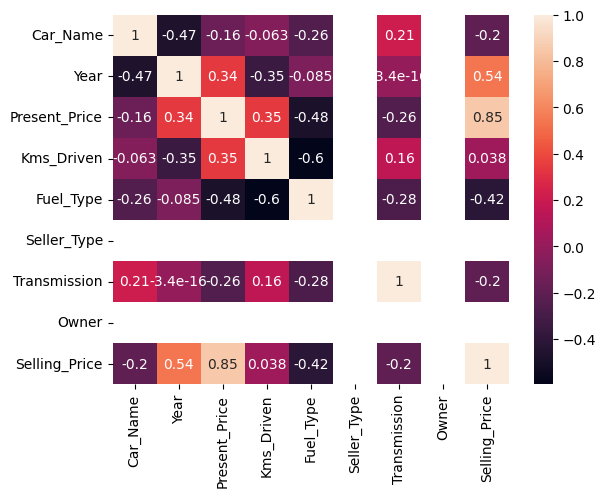

In [67]:
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()


In [68]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [69]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)*100 , lr.score(x_test, y_test)*100

(86.46894341456289, 86.1742805471164)

In [70]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt.score(x_train, y_train)*100 , dt.score(x_test, y_test)*100

(100.0, 100.0)

In [71]:
rf = RandomForestRegressor(n_estimators= 100)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)*100 , rf.score(x_test, y_test)*100

(100.0, 100.0)

mean_squared_error(y_test, rf.predict(x_test))
mean_absolute_error(y_test, rf.predict(x_test))

In [72]:
rf.predict([[-1.161981	,1.183216	,-2.091724	,-1.362511	,1.0	,0.0	,0.277350	,0.0]])

C:\Users\SHREE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.25])

In [73]:
x_test

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
108,-1.161981,1.183216,-2.091724,-1.362511,1.0,0.0,0.277350,0.0
67,-0.765207,0.000000,1.131433,1.686271,-1.0,0.0,0.277350,0.0
31,2.012212,-2.366432,-1.830259,-1.171279,1.0,0.0,0.277350,0.0
119,0.425115,0.000000,0.289989,0.589983,-1.0,0.0,0.277350,0.0
42,0.028341,-0.591608,-1.145694,0.188865,1.0,0.0,0.277350,0.0
12,-0.765207,0.000000,0.922260,-0.559838,1.0,0.0,-3.605551,0.0
81,-0.765207,0.000000,1.131433,1.686271,-1.0,0.0,0.277350,0.0
69,-0.368433,0.000000,-0.137864,0.126473,1.0,0.0,0.277350,0.0
104,-0.765207,0.000000,0.057047,-0.322999,1.0,0.0,0.277350,0.0
109,-0.765207,0.000000,1.131433,1.686271,-1.0,0.0,0.277350,0.0


In [74]:
y_test

108    2.25
67     6.85
31     2.85
119    6.50
42     3.35
12     7.50
81     6.85
69     6.10
104    6.75
109    6.85
113    4.75
56     3.35
66     2.25
19     9.25
132    6.75
78     8.75
11     6.85
27     6.10
127    4.75
110    7.50
36     8.75
118    6.75
60     4.60
4      4.60
131    9.25
26     7.50
138    7.50
96     7.50
Name: Selling_Price, dtype: float64

In [96]:
new_data=pd.DataFrame([["ritz",2014,5.59,27000,"Petrol","Dealer","Manual",	0]],columns=x_train.columns)

In [111]:
new_data

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,-1.161981,-0.591608,-1.145694,0.188865,-1.0,0.0,-3.605551,0.0


In [98]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder for Car_Name
car_name_l = LabelEncoder()
new_data["Car_Name"] = car_name_l.fit_transform(new_data["Car_Name"])

In [99]:
from sklearn.preprocessing import LabelEncoder

fuel_type_l = LabelEncoder()
new_data["Fuel_Type"] = fuel_type_l.fit_transform(new_data["Fuel_Type"])


In [100]:
from sklearn.preprocessing import LabelEncoder

fuel_type_l = LabelEncoder()
new_data["Fuel_Type"] = fuel_type_l.fit_transform(new_data["Fuel_Type"])


In [101]:
# For Seller_Type
seller_type_l = LabelEncoder()
new_data["Seller_Type"] = seller_type_l.fit_transform(new_data["Seller_Type"])

In [102]:
# For Transmission
transmission_l = LabelEncoder()
new_data["Transmission"] = transmission_l.fit_transform(new_data["Transmission"])

In [103]:
# Remove wrong column if exists
if "Car_Name\t" in new_data.columns:
    new_data.drop(columns=["Car_Name\t"], inplace=True)


In [104]:
print(new_data.columns)

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [110]:
new_data = pd.DataFrame(ss.transform(new_data), columns=new_data.columns)


In [114]:
rf.predict(new_data)

array([4.1075])